<a href="https://colab.research.google.com/github/Jaiharish-passion07/Almabetter-Capstone_project/blob/master/Machine_larning_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Mounting drive to load data 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Motivated Capstone project/ml reg data/SeoulBikeData.csv',encoding= 'unicode_escape')
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [6]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [7]:
#Convert the Date column in Datetime Dtype
df['Date']=pd.to_datetime(df['Date'])

#Breaking Down the Date into 3 Components
df['Day']=df['Date'].dt.day
df['Month']=df['Date'].dt.month
df['Year']=df['Date'].dt.year
df.drop(['Date'],axis=1,inplace=True)
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Year
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017


In [8]:
df['Year'].unique()

array([2017, 2018])

In [9]:
df['Month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

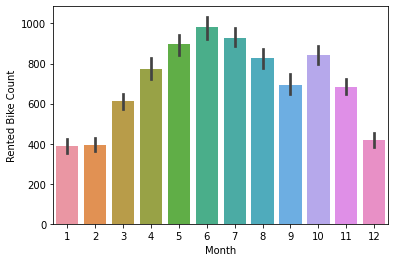

In [10]:
sns.barplot(df['Month'],df['Rented Bike Count'])

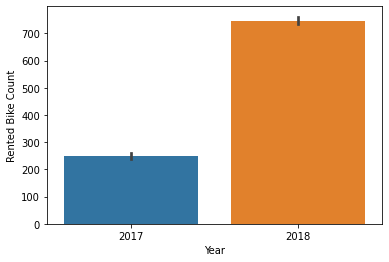

In [11]:
sns.barplot(df['Year'],df['Rented Bike Count'])

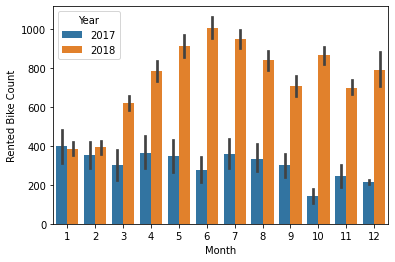

In [12]:
sns.barplot(df['Month'],df['Rented Bike Count'],hue=df['Year'])

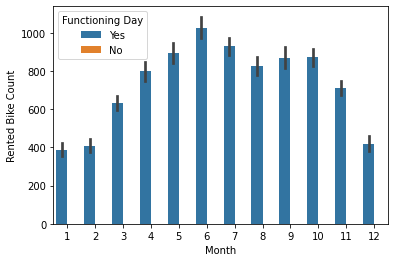

In [13]:
 sns.barplot(x=df['Month'],y=df['Rented Bike Count'],hue=df['Functioning Day']);

In [14]:
df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'Day', 'Month', 'Year'],
      dtype='object')

#### Month and Year has a impact in the Target Variable,So we Droping the Day column

In [15]:
df.drop(['Day'],axis=1,inplace=True)


In [16]:
numeric_features = df.describe().columns
numeric_features

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Month',
       'Year'],
      dtype='object')

🤪Right Skewed Data:<br>
1. Rented Bike count<br>
2. Wind speed (m/s)<br>
3. Solar Radiation (MJ/m2)<br>
4. Rainfall(mm)<br> 
5. Snowfall (cm)

🤪Left Skewed Data:
1. Visibility (10m)

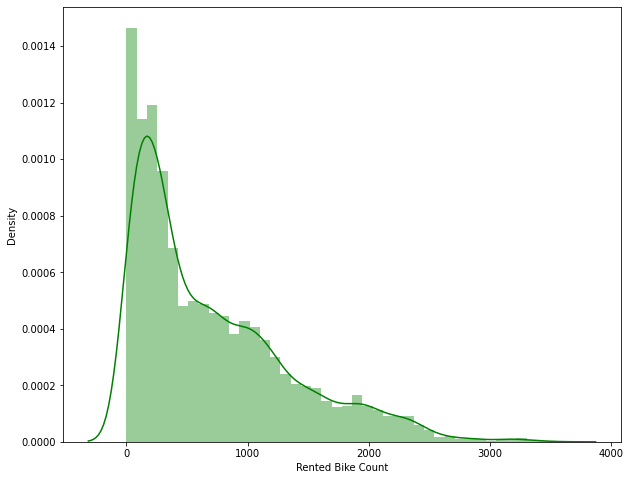

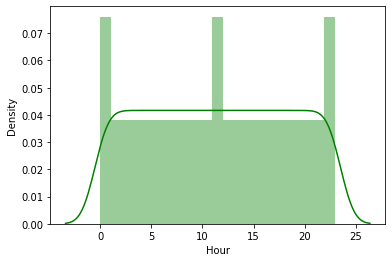

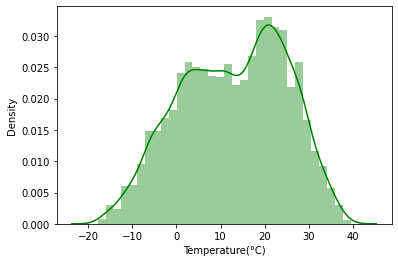

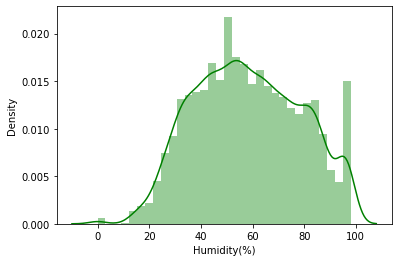

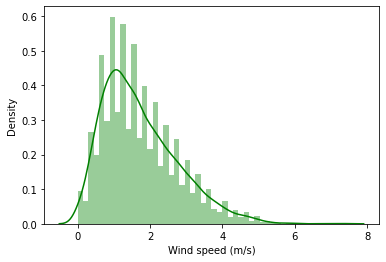

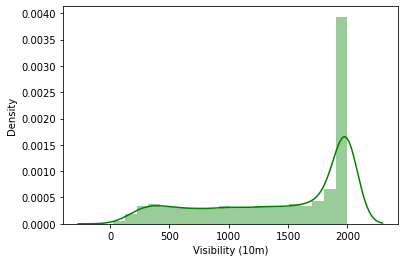

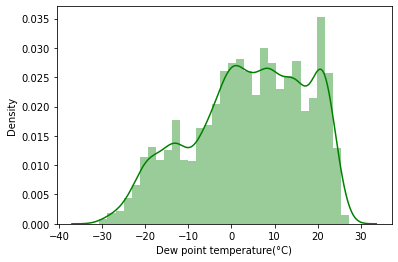

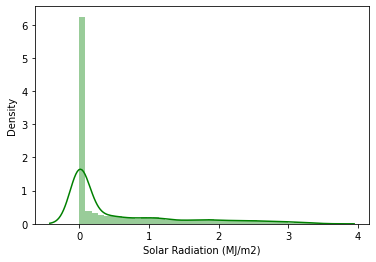

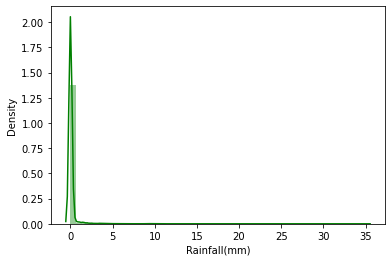

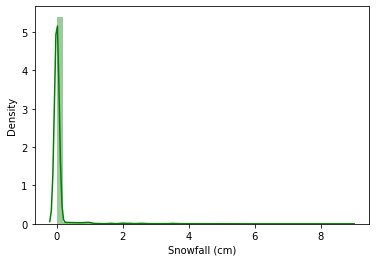

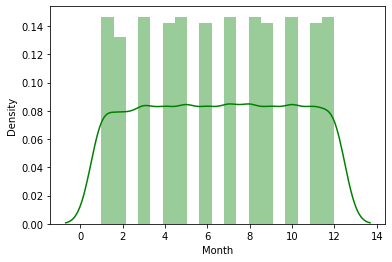

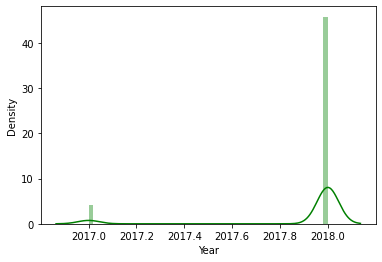

In [17]:
plt.figure(figsize=(10,8))
for col in numeric_features:
  sns.distplot(df[col],color='g')
  plt.show()

In [18]:
right_ske_numeric=['Rented Bike Count','Wind speed (m/s)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)']
left_skew_feat=['Dew point temperature(°C)','Visibility (10m)']

when removing outlier using IQR technique most of the values goes off and only 0 is left behind for Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)

log of 0's and -ve value is not possible

In [19]:
#Creating funtion to remove outlier using Inter Quantile Range
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3-Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

lowerbound,upperbound = outlier_treatment(df['Rented Bike Count'])
df.drop(df[(df['Rented Bike Count'] > upperbound) | (df['Rented Bike Count'] < lowerbound) ].index , inplace=True)

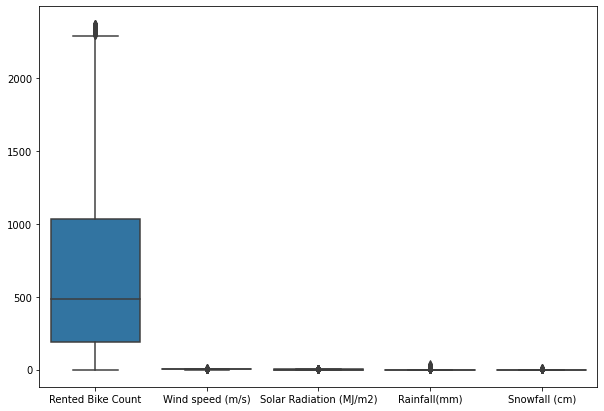

In [20]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df[right_ske_numeric])

In [21]:
df.shape

(8602, 15)

In [22]:
df = df[df['Wind speed (m/s)']<=4.5]
df=df[df['Solar Radiation (MJ/m2)']<=3]
df=df[df['Rainfall(mm)']<=10]
df=df[df['Snowfall (cm)']<=4]

In [23]:
df.shape

(8301, 15)

can't perform exponential transform for left skew data because once perormed it goes to infinity

In [24]:
import scipy.stats as stat
import pylab

In [25]:
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    sns.distplot(df[feature],color="r")
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

For Right Skewed Data

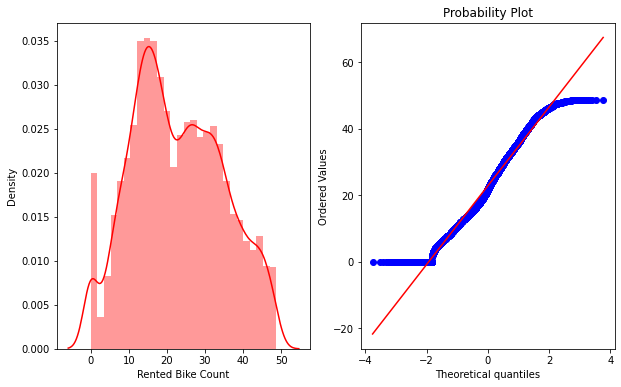

<Figure size 504x504 with 0 Axes>

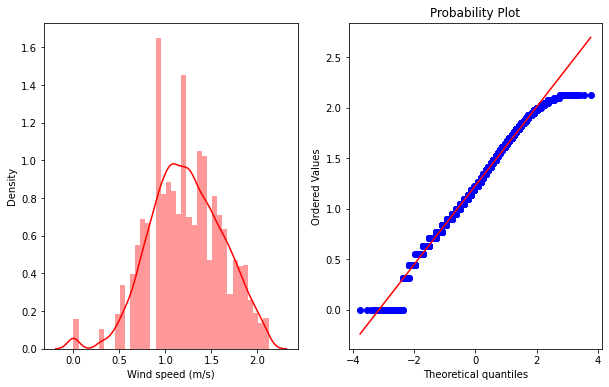

<Figure size 504x504 with 0 Axes>

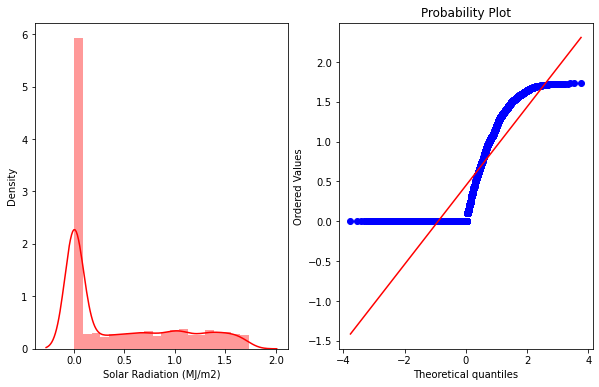

<Figure size 504x504 with 0 Axes>

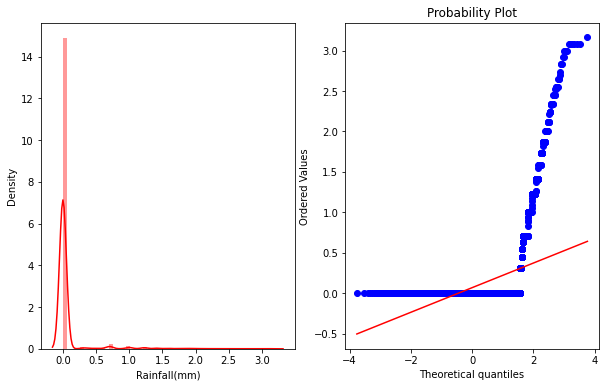

<Figure size 504x504 with 0 Axes>

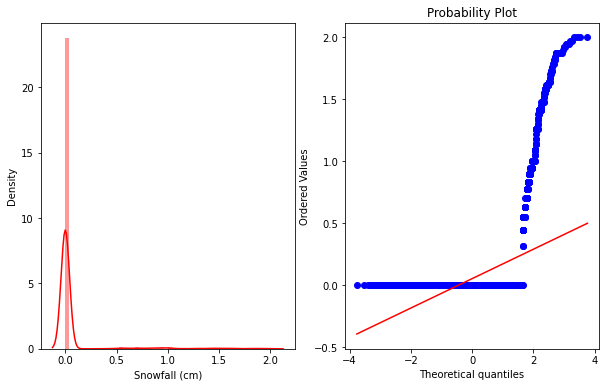

<Figure size 504x504 with 0 Axes>

In [26]:
df_clean=df.copy()
for col in right_ske_numeric:
  df_clean[col]=np.sqrt(df_clean[col])
  plot_data(df_clean,col)
  plt.figure(figsize=(7,7))

For Left Skewed Data

√(x_max-x_i )

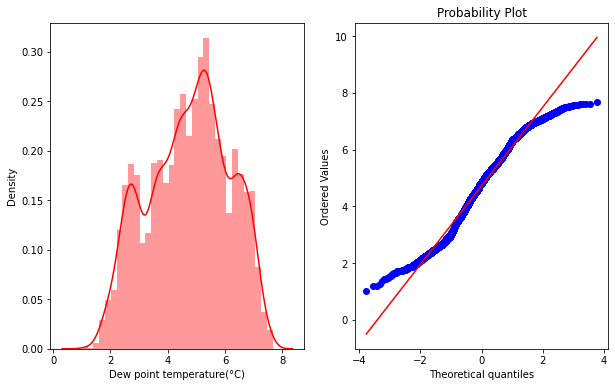

<Figure size 504x504 with 0 Axes>

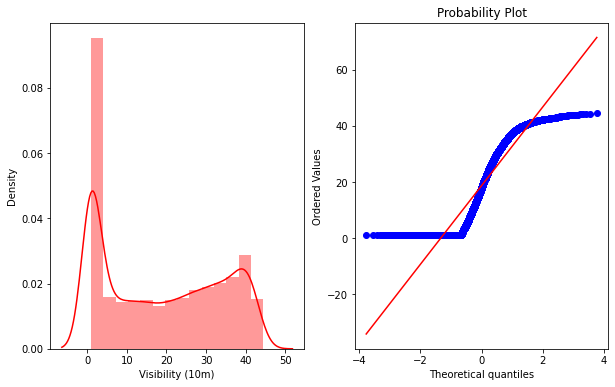

<Figure size 504x504 with 0 Axes>

In [27]:
for col in left_skew_feat:
  df_clean[col]=np.sqrt(max(df_clean[col]+1)-df_clean[col])
  plot_data(df_clean,col)
  plt.figure(figsize=(7,7))

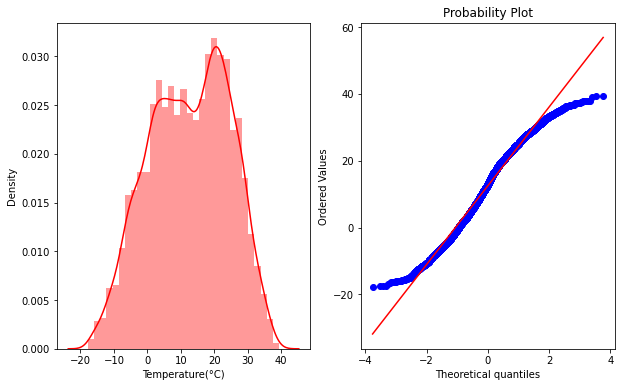

<Figure size 504x504 with 0 Axes>

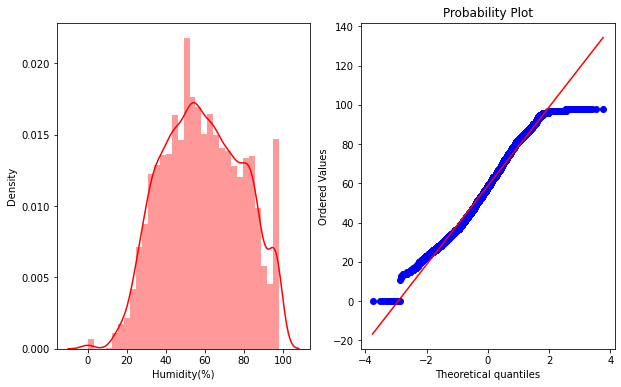

<Figure size 504x504 with 0 Axes>

In [28]:
fea=['Temperature(°C)', 'Humidity(%)']
for col in fea:
  plot_data(df_clean,col)
  plt.figure(figsize=(7,7))

Temperature and Humidity they are already in Normal Form

In [29]:
df_clean.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,Year
0,15.937377,0,-5.2,37,1.483240,1.0,6.767570,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017
1,14.282857,1,-5.5,38,0.894427,1.0,6.767570,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017
2,13.152946,2,-6.0,39,1.000000,1.0,6.774954,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017
3,10.344080,3,-6.2,40,0.948683,1.0,6.767570,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017
4,8.831761,4,-6.0,36,1.516575,1.0,6.841053,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017


In [30]:
np.sqrt(254)

15.937377450509228

In [31]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,Year
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017


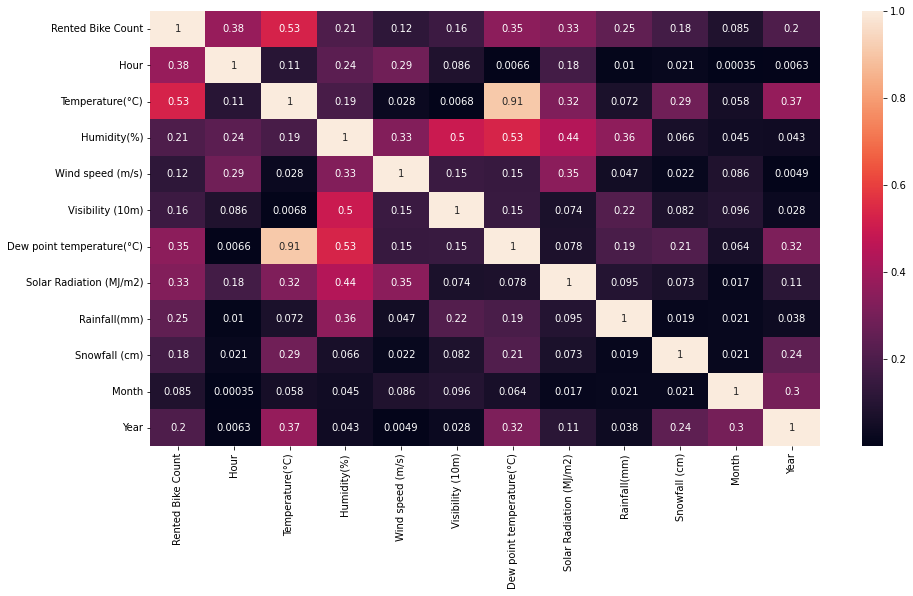

In [32]:
 ## Correlation
plt.figure(figsize=(15,8))
correlation = df_clean.corr()
sns.heatmap(abs(correlation), annot=True)

Removal of Multicollinearity

In [33]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [34]:
calc_vif(df_clean[[i for i in df_clean.describe().columns if i not in ['Month', 'Year','Rented Bike Count','Dew point temperature(°C)','Visibility (10m)']]])

,variables,VIF
0,Hour,3.878848
1,Temperature(°C),3.165839
2,Humidity(%),6.830532
3,Wind speed (m/s),8.898106
4,Solar Radiation (MJ/m2),2.622443
5,Rainfall(mm),1.149809
6,Snowfall (cm),1.176049


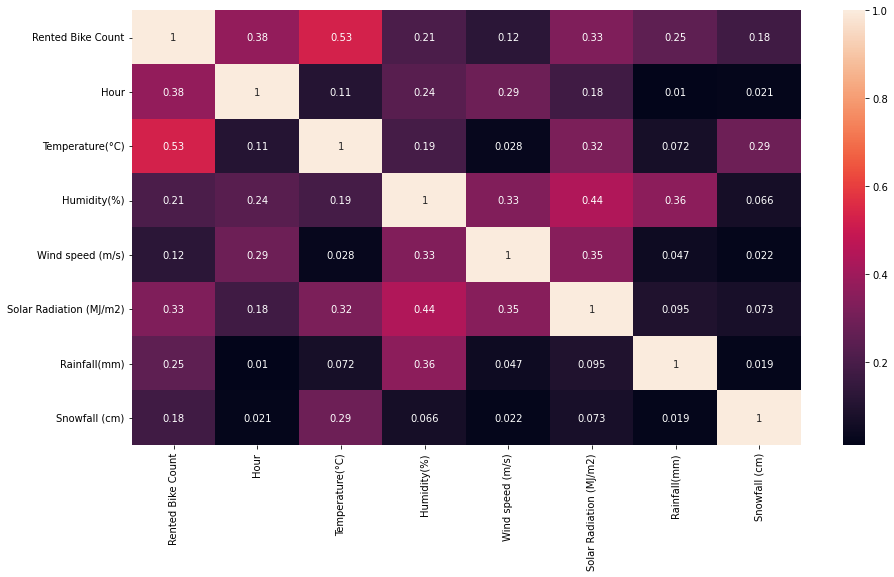

In [35]:
## Correlation
plt.figure(figsize=(15,8))
correlation = df_clean[[i for i in df_clean.describe().columns if i not in ['Month', 'Year','Dew point temperature(°C)','Visibility (10m)']]].corr()
sns.heatmap(abs(correlation), annot=True)

In [36]:
final_numeric_features=[i for i in df_clean.describe().columns if i not in ['Dew point temperature(°C)','Visibility (10m)']]
categorical_features = df_clean.describe(include=['object','category']).columns
final_numeric_features.extend(categorical_features)

In [37]:
df_final_data=df_clean[final_numeric_features].copy()
df_final_data.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Month,Year,Seasons,Holiday,Functioning Day
0,15.937377,0,-5.2,37,1.483240,0.0,0.0,0.0,1,2017,Winter,No Holiday,Yes
1,14.282857,1,-5.5,38,0.894427,0.0,0.0,0.0,1,2017,Winter,No Holiday,Yes
2,13.152946,2,-6.0,39,1.000000,0.0,0.0,0.0,1,2017,Winter,No Holiday,Yes
3,10.344080,3,-6.2,40,0.948683,0.0,0.0,0.0,1,2017,Winter,No Holiday,Yes
4,8.831761,4,-6.0,36,1.516575,0.0,0.0,0.0,1,2017,Winter,No Holiday,Yes


In [38]:
df_final_data['Seasons'].value_counts()

Autumn    2114
Winter    2107
Spring    2057
Summer    2023
Name: Seasons, dtype: int64

In [39]:
df_final_data['Holiday'].value_counts()

No Holiday    7882
Holiday        419
Name: Holiday, dtype: int64

In [40]:
df_final_data['Functioning Day'].value_counts()

Yes    8017
No      284
Name: Functioning Day, dtype: int64

In [41]:
#Mapping the Variables
df_final_data['Functioning Day']=df_final_data['Functioning Day'].map({'Yes':1,'No':0})
df_final_data['Holiday']=df_final_data['Holiday'].map({'No Holiday':0,'Holiday':1})

In [42]:
season=pd.get_dummies(df_final_data['Seasons'],drop_first=True)
df_final_data.drop('Seasons',axis=1,inplace=True)

In [43]:
df_final_data=pd.concat([df_final_data,season],axis='columns')
df_final_data.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Month,Year,Holiday,Functioning Day,Spring,Summer,Winter
0,15.937377,0,-5.2,37,1.483240,0.0,0.0,0.0,1,2017,0,1,0,0,1
1,14.282857,1,-5.5,38,0.894427,0.0,0.0,0.0,1,2017,0,1,0,0,1
2,13.152946,2,-6.0,39,1.000000,0.0,0.0,0.0,1,2017,0,1,0,0,1
3,10.344080,3,-6.2,40,0.948683,0.0,0.0,0.0,1,2017,0,1,0,0,1
4,8.831761,4,-6.0,36,1.516575,0.0,0.0,0.0,1,2017,0,1,0,0,1


In [44]:
x=df_final_data.drop('Rented Bike Count',axis=1)
y=np.log10(df_final_data['Rented Bike Count']+1)


In [45]:
x.head()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Month,Year,Holiday,Functioning Day,Spring,Summer,Winter
0,0,-5.2,37,1.483240,0.0,0.0,0.0,1,2017,0,1,0,0,1
1,1,-5.5,38,0.894427,0.0,0.0,0.0,1,2017,0,1,0,0,1
2,2,-6.0,39,1.000000,0.0,0.0,0.0,1,2017,0,1,0,0,1
3,3,-6.2,40,0.948683,0.0,0.0,0.0,1,2017,0,1,0,0,1
4,4,-6.0,36,1.516575,0.0,0.0,0.0,1,2017,0,1,0,0,1


In [46]:
y.head()

0    1.228846
1    1.184205
2    1.150847
3    1.054769
4    0.992631
Name: Rented Bike Count, dtype: float64

zscore

In [47]:
from scipy.stats import zscore
#Train test split
X =x.apply(zscore)

In [48]:
X

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Month,Year,Holiday,Functioning Day,Spring,Summer,Winter
0,-1.614197,-1.489635,-1.078174,0.654533,-0.795048,-0.215389,-0.212349,-1.589134,-3.239943,-0.230563,0.188215,-0.573965,-0.567659,1.714563
1,-1.471413,-1.514875,-1.028718,-0.852267,-0.795048,-0.215389,-0.212349,-1.589134,-3.239943,-0.230563,0.188215,-0.573965,-0.567659,1.714563
2,-1.328629,-1.556943,-0.979262,-0.582101,-0.795048,-0.215389,-0.212349,-1.589134,-3.239943,-0.230563,0.188215,-0.573965,-0.567659,1.714563
3,-1.185844,-1.573770,-0.929806,-0.713423,-0.795048,-0.215389,-0.212349,-1.589134,-3.239943,-0.230563,0.188215,-0.573965,-0.567659,1.714563
4,-1.043060,-1.556943,-1.127630,0.739840,-0.795048,-0.215389,-0.212349,-1.589134,-3.239943,-0.230563,0.188215,-0.573965,-0.567659,1.714563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1.098705,-0.698770,-1.226543,0.985192,-0.795048,-0.215389,-0.212349,1.285937,0.308647,-0.230563,0.188215,-0.573965,-0.567659,-0.583239
8756,1.241489,-0.766078,-1.078174,0.739840,-0.795048,-0.215389,-0.212349,1.285937,0.308647,-0.230563,0.188215,-0.573965,-0.567659,-0.583239
8757,1.384273,-0.833385,-0.979262,-1.739501,-0.795048,-0.215389,-0.212349,1.285937,0.308647,-0.230563,0.188215,-0.573965,-0.567659,-0.583239
8758,1.527058,-0.875453,-0.880350,-0.582101,-0.795048,-0.215389,-0.212349,1.285937,0.308647,-0.230563,0.188215,-0.573965,-0.567659,-0.583239


std scalar

In [49]:
# from sklearn.preprocessing import StandardScaler
# scale=StandardScaler()
# X=scale.fit_transform(x)

In [50]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(6640, 14)
(1661, 14)


In [51]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)

In [52]:
print("Train Accuracy:",reg.score(X_train, y_train))
print("Test Accuracy:",reg.score(X_test, y_test))

Train Accuracy: 0.8358954751901122
Test Accuracy: 0.83579538863978


In [53]:
y_train_pred=reg.predict(X_train)
y_pred = reg.predict(X_test)

In [54]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


MSE  = mean_squared_error(np.round((10**(y_test))**2),np.round((10**(y_pred))**2))
print("MSE :" , MSE)

MAE=mean_absolute_error(np.round((10**(y_test))**2),np.round((10**(y_pred))**2))
print("MAE :" ,MAE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 161004.044551475
MAE : 260.6008428657435
RMSE : 401.25309288711406


In [55]:
from sklearn.metrics import r2_score
r2 = r2_score(np.round((10**(y_test))**2),np.round((10**(y_pred))**2))
print("R2 :" ,r2)
#print("Adjusted R2 : ",1-(1-r2_score((10**(y_test))**2),np.round((10**(y_pred))**2)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.5769353305833766


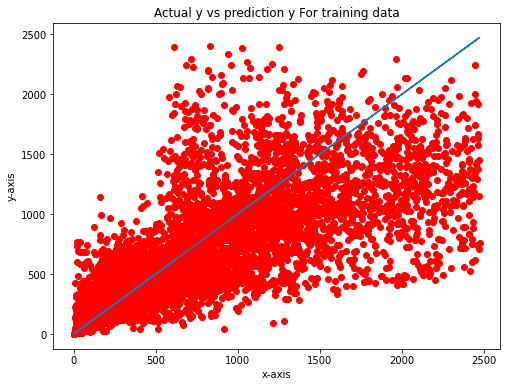

In [56]:
plt.figure(figsize=(8,6))
plt.plot(np.round((10**(y_train))**2),np.round((10**(y_train))**2))
plt.scatter(np.round((10**(y_train))**2),np.round((10**(y_train_pred))**2),color='r')
# Adding the title
plt.title("Actual y vs prediction y For training data")
# Adding the labels
plt.ylabel("y-axis")
plt.xlabel("x-axis")
plt.show()

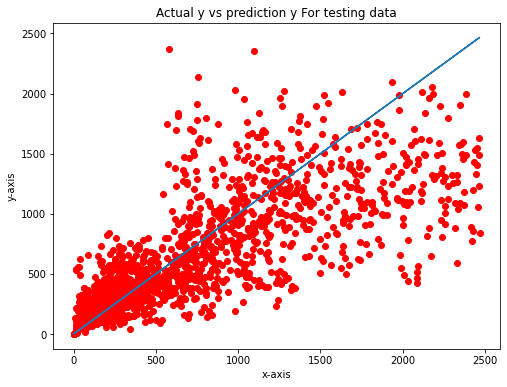

In [57]:
plt.figure(figsize=(8,6))
plt.plot(np.round((10**(y_test))**2),np.round((10**(y_test))**2))
plt.scatter(np.round((10**(y_test))**2),np.round((10**(y_pred))**2),color='r')
# Adding the title
plt.title("Actual y vs prediction y For testing data")
# Adding the labels
plt.ylabel("y-axis")
plt.xlabel("x-axis")
plt.show()

In [58]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

lasso  = Lasso(alpha=0.00005 , max_iter= 5000)
ridge  = Ridge(alpha=0.00005 , max_iter= 5000)

lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)

Ridge(alpha=5e-05, max_iter=5000)

In [59]:
lasso.score(X_train, y_train)

0.8358946205357712

In [60]:
ridge.score(X_train, y_train)

0.8358954751901122

Hyperparameter Tuning

In [61]:
#Imports
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import model_selection
#seed for random state and splits - number of Kfolds
random_seed = 1
splits = 5
#Scikit Kfold model call
kfold = model_selection.KFold(n_splits=splits,random_state=random_seed,shuffle=True)
#Linear Regression Model
model = LinearRegression()
#results set equal to model with kfolds
results = model_selection.cross_val_score(model, X_train,y_train,cv=kfold)
#printing the averaged score over the 5 Kfolds
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 83.455% (1.077%)


In [69]:
ridg=Ridge(alpha=1e-05, fit_intercept=True, normalize=False, solver='lsqr')


In [71]:
ridg.fit(X_train,y_train)

Ridge(alpha=1e-05, normalize=False, solver='lsqr')

In [73]:
ridg.score(X_train,y_train)

0.8358911197036918

Random Forest Algorithm

In [74]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor

# create regressor object
random_reg = RandomForestRegressor(n_estimators = 100, random_state = 0)

# fit the regressor with x and y data
random_reg.fit(X_train, y_train)


RandomForestRegressor(random_state=0)

In [77]:
print("Train Accuracy:",random_reg.score(X_train, y_train))
print("Test Accuracy:",random_reg.score(X_test, y_test))

Train Accuracy: 0.9913167346638048
Test Accuracy: 0.9271564675229635


In [78]:
y_train_pred_random=random_reg.predict(X_train)
y_pred_random = random_reg.predict(X_test)

In [79]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


MSE  = mean_squared_error(np.round((10**(y_test))**2),np.round((10**(y_pred_random))**2))
print("MSE :" , MSE)

MAE=mean_absolute_error(np.round((10**(y_test))**2),np.round((10**(y_pred_random))**2))
print("MAE :" ,MAE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 52499.57676098736
MAE : 137.69235400361228
RMSE : 229.12786116268654


In [80]:
from sklearn.metrics import r2_score
r2 = r2_score(np.round((10**(y_test))**2),np.round((10**(y_pred_random))**2))
print("R2 :" ,r2)
#print("Adjusted R2 : ",1-(1-r2_score((10**(y_test))**2),np.round((10**(y_pred))**2)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.8620487072310863


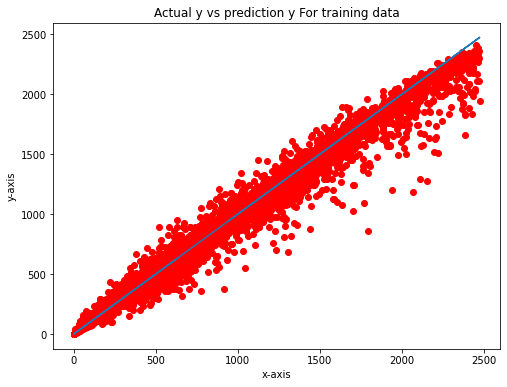

In [82]:
plt.figure(figsize=(8,6))
plt.plot(np.round((10**(y_train))**2),np.round((10**(y_train))**2))
plt.scatter(np.round((10**(y_train))**2),np.round((10**(y_train_pred_random))**2),color='r')
# Adding the title
plt.title("Actual y vs prediction y For training data")
# Adding the labels
plt.ylabel("y-axis")
plt.xlabel("x-axis")
plt.show()

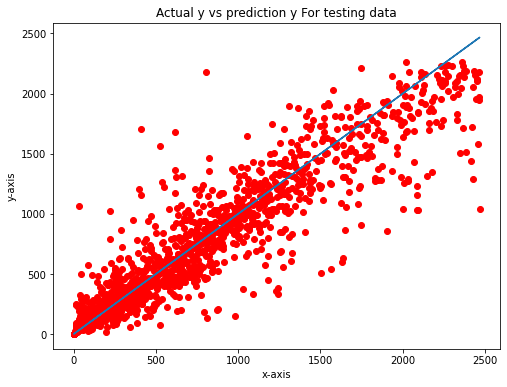

In [81]:
plt.figure(figsize=(8,6))
plt.plot(np.round((10**(y_test))**2),np.round((10**(y_test))**2))
plt.scatter(np.round((10**(y_test))**2),np.round((10**(y_pred_random))**2),color='r')
# Adding the title
plt.title("Actual y vs prediction y For testing data")
# Adding the labels
plt.ylabel("y-axis")
plt.xlabel("x-axis")
plt.show()